#**SET UP**

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# **LOAD DATA**

In [ ]:
fashion_MNIST = tf.keras.datasets.fashion_mnist
(training_images,training_labels), (validation_images,validation_labels) = fashion_MNIST.load_data()

4423680/4422102 [==============================] - 0s 0us/step


9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 

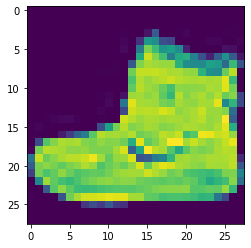

In [ ]:

np.set_printoptions(linewidth=200) # Set printing options. linewidthint, optional. The number of characters per line for the purpose of inserting line breaks (default 75).
import matplotlib.pyplot as plt
plt.imshow(training_images[0])
print(training_labels[0])
print(training_images[0])

In [ ]:
training_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

0
[[  0   0   0   0   0   1   0   0   0   0  41 188 103  54  48  43  87 168 133  16   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0  49 136 219 216 228 236 255 255 255 255 217 215 254 231 160  45   0   0   0   0   0]
 [  0   0   0   0   0  14 176 222 224 212 203 198 196 200 215 204 202 201 201 201 209 218 224 164   0   0   0   0]
 [  0   0   0   0   0 188 219 200 198 202 198 199 199 201 196 198 198 200 200 200 200 201 200 225  41   0   0   0]
 [  0   0   0   0  51 219 199 203 203 212 238 248 250 245 249 246 247 252 248 235 207 203 203 222 140   0   0   0]
 [  0   0   0   0 116 226 206 204 207 204 101  75  47  73  48  50  45  51  63 113 222 202 206 220 224   0   0   0]
 [  0   0   0   0 200 222 209 203 215 200   0  70  98   0 103  59  68  71  49   0 219 206 214 210 250  38   0   0]
 [  0   0   0   0 247 218 212 210 215 214   0 254 243 139 255 174 251 255 205   0 215 217 214 208 220  95   0   0]
 [  0   0   0  45 226 214 214 215 224 205   0  42  35  60  16  17  12  13  70 

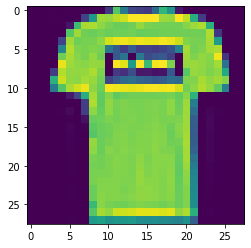

In [ ]:
print(training_labels[1])
print(training_images[1])
plt.imshow(training_images[1])

In [ ]:
training_images[0].shape

(28, 28)

# **Normalization data** (data preparation)

This transformation sets the mean of data to 0 and the standard deviation to 1. In most cases, standardization is used feature-wise

[link to reference ](https://medium.com/@urvashilluniya/why-data-normalization-is-necessary-for-machine-learning-models-681b65a05029)

In [ ]:
training_images , validation_images = training_images/255.0 , validation_images/255.0

# **Buiding the model 1**

In this section, I'll build the model by DNN with 3 layers 

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>=90):
      print("\nReached 90% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape = (28,28,1)),
     tf.keras.layers.Dense(128,activation="relu"),
     tf.keras.layers.Dense(10, activation="softmax") ])

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_17 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer = "adam",
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5031 - accuracy: 0.8241
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3769 - accuracy: 0.8634
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3378 - accuracy: 0.8770
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3115 - accuracy: 0.8869
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2953 - accuracy: 0.8912


In [ ]:
model.evaluate(validation_images,validation_labels)

313/313 [==============================] - 0s 2ms/step - loss: 0.3671 - accuracy: 0.8668


[0.3670503795146942, 0.8668000102043152]

In [ ]:
###################### Increase to 1024 Neurons -- What's the impact? 
###################### in this case they have a good impact -- we do get more accurate.|

In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape = (28,28,1)),
     tf.keras.layers.Dense(1024,activation="relu"),
     tf.keras.layers.Dense(10, activation="softmax") ]) # u have to set the final ouputs is 10 because unless it is 10, u will get the error of value and get get
                                                       # unexpected value , 10 is equivalent with 10 classes 0..9   


In [ ]:
model.compile(optimizer = "adam",loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(training_images,training_labels,epochs=5,callbacks=[callbacks])

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4708 - accuracy: 0.8298
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3577 - accuracy: 0.8693
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3194 - accuracy: 0.8804
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2965 - accuracy: 0.8909
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2746 - accuracy: 0.8974


* Increase to 1024 Neurons -- What's the impact? 

In this case they have a good impact -- we do get more accurate.

* Consider the effects of additional layers in the network. What will happen if you add another layer between the one with 512 and the final layer with 10.  

There isn't a significant impact -- because this is relatively simple data. For far more complex data , extra layers are often necessary.

* Consider the impact of training for more or less epochs. Why do you think that would be the case? 

Try 15 epochs -- you'll probably get a model with a much better loss than the one with 5
Try 30 epochs -- you might see the loss value stops decreasing, and sometimes increases. This is a side effect of something called 'overfitting' and it's something you need to keep an eye out for when training neural networks. 




# **Building model 2**

Using Convolutions and Maxpooling 

* Convolution: In short, you take an array (usually 3x3 or 5x5) and pass it over the image. By changing the underlying pixels based on the formula within that matrix, you can do things like edge detection. So, for example, if you look at the above link, you'll see a 3x3 that is defined for edge detection where the middle cell is 8, and all of its neighbors are -1. In this case, for each pixel, you would multiply its value by 8, then subtract the value of each neighbor. Do this for every pixel, and you'll end up with a new image that has the edges enhanced.

This is the same neural network as earlier, but this time with Convolutional layers added first. It will take longer, but the influence of accuracy 

* You'll follow the Convolution with a **MaxPooling** layer which is then designed to compress the image, while maintaining the content of the features that were highlighted by the convlution. By specifying (2,2) for the MaxPooling, the effect is to quarter the size of the image. Without going into too much detail here, the idea is that it creates a 2x2 array of pixels, and picks the biggest one, thus turning 4 pixels into 1. It repeats this across the image, and in so doing halves the number of horizontal, and halves the number of vertical pixels, effectively reducing the image by 25%.


In [51]:
model2 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28,1)), # 64 kernels (3*3) for convolution layers, input_shape must be (m,m,1)
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model2.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_30 (Dense)             (None, 128)               204928    
_________________________________________________________________
dense_31 (Dense)             (None, 10)              

In [50]:
training_images = training_images.reshape(60000,28,28,1)
validation_images = validation_images.reshape(10000,28,28,1) 
model2.compile(loss="sparse_categorical_crossentropy",optimizer = "adam", metrics=["accuracy"] )
model2.fit(training_images, training_labels, epochs = 5, callbacks = [callbacks])

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7936 - accuracy: 0.7041
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6368 - accuracy: 0.7589
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6014 - accuracy: 0.7727
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5819 - accuracy: 0.7802
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5656 - accuracy: 0.7872


In [43]:
test_loss = model.evaluate(validation_images, validation_labels)
test_loss

313/313 [==============================] - 0s 2ms/step - loss: 0.3318 - accuracy: 0.8809


[0.3317919671535492, 0.8809000253677368]

* ### We can see the impact of Conv and max pooling layers in the accuracy (92,83% with 89%) and loss_accuracy (88% with 86%)

* ### Change the 64s to either 32 or 16:
decrease the accuracy of the traning_loss
* ### remove the final convolution :
decrease the accuracy of the traning_loss



# **Prediction**

In [ ]:
predict = model.predict(validation_images[0:1])
predict

array([[3.9678744e-05, 1.5156003e-06, 4.8604911e-06, 1.7396388e-06, 2.7696929e-05, 4.6661820e-02, 1.8817167e-05, 8.4387086e-02, 1.7853995e-06, 8.6885500e-01]], dtype=float32)

In [ ]:
final=np.argmax(predict) 
final 

9

In [ ]:
training_labels[0]

9

# **NOTE**

* The Fashion MNIST data is available directly in the tf.keras datasets API. You load it like this: 
 * **mnist = tf.keras.datasets.fashion_mnist**
 *  **mnist.load_data() to load data**

* The model
 
 * **Sequential**: That defines a SEQUENCE of layers in the neural network
 * **Flatten**: Remember earlier where our images were a square, when you printed them out? **Flatten** just takes that square and turns it into a 1 dimensional set.

 * **Dense**: Adds a layer of neurons

 * Each layer of neurons need an **activation function**to tell them what to do. There's lots of options, but just use these for now.

   * **Relu** effectively means "If X>0 return X, else return 0" -- so what it does it it only passes values 0 or greater to the next layer in the network.

   * **Softmax** takes a set of values, and effectively picks the biggest one, so, for example, if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], it saves you from fishing through it looking for the biggest value, and turns it into [0,0,0,0,1,0,0,0,0] -- The goal is to save a lot of coding!
 * **model.compile**(optimizer = tf.optimizers.Adam(),loss = 'sparse_catego rical_crossentropy', metrics=['accuracy'])  
the methode complile() method : specifying the loss, metrics and optimizers 
 * **model.fit**(training_images, training_labels, epochs=5)                
 * **model.evaluate(test_images, test_labels)**  : We evaluate the model on the test data via evaluate():


   